In [5]:
import chainer
from chainer import functions as F
from chainer import links as L
from chainer import Variable
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [141]:
x=np.linspace(0,10, 1000)
x2=np.linspqace(0,30, 1000)
yt=np.sin(x)
y2t=np.sin(x2)

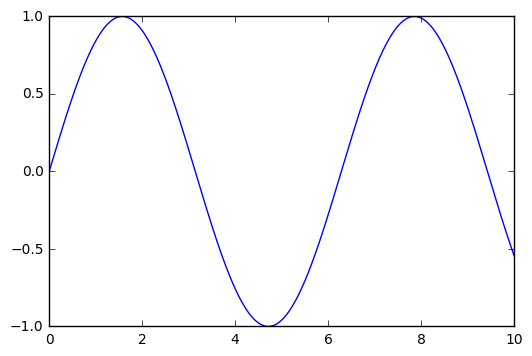

In [41]:
plt.plot(x, yt)

In [211]:
class FunctionModel(chainer.Chain):
    def __init__(self, nh1, nh2):
        super(FunctionModel, self).__init__(
            l1=L.Linear(1, nh1),
            l2=L.Linear(nh1, nh2),
            lf=L.Linear(nh2, 1))
        return
    def forward(self, x):
        h = F.relu(self.l1(x))
        h = F.relu(self.l2(h))
        y = self.lf(h)
        return y
    def loss(self, x, yt):
        y = self.forward(x)
        l = F.mean_squared_error(y, yt)
        return l

                    

In [212]:
m = FunctionModel(10, 10)
optimizer = chainer.optimizers.Adam()
optimizer.setup(m)

In [213]:
xb = x.reshape(1000,1).astype(np.float32)
x2b = x2.reshape(1000, 1).astype(np.float32)
ytb = yt.reshape(1000, 1).astype(np.float32)

(1000, 1)


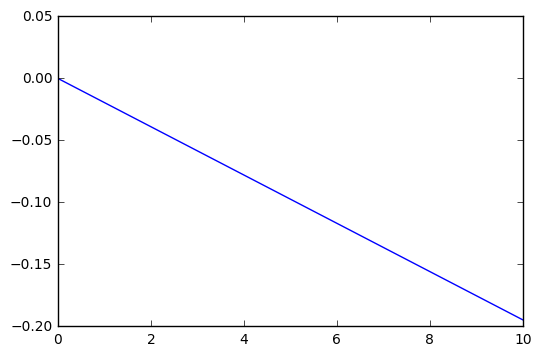

In [214]:
vy = m.forward(xb)
plt.plot(x, vy.data[:,0])
print(vy.data.shape)

In [215]:
losses = []

In [221]:
for i in range(1000):
    optimizer.update(m.loss, xb, ytb)
    if i % 10 == 0:
        losses.append(m.loss(xb, ytb).data)

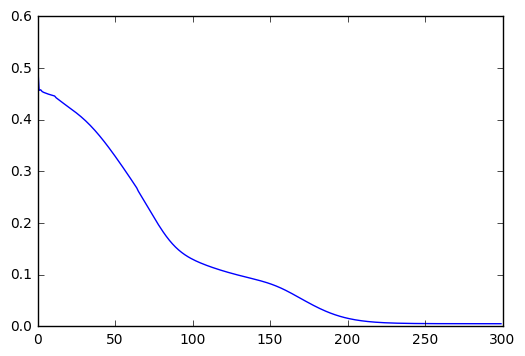

In [222]:
plt.plot(losses)

(1000, 1)


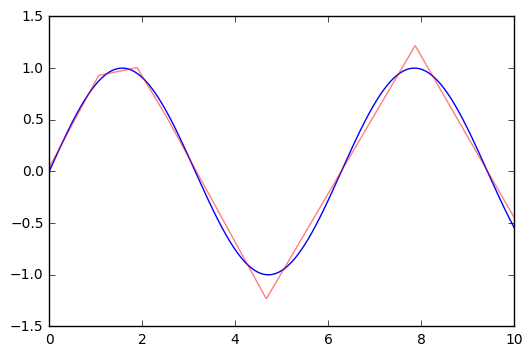

In [223]:
vy = m.forward(xb)
plt.plot(x, yt)
plt.plot(x, vy.data[:,0], color="red", alpha=0.5)
print(vy.data.shape)

(1000, 1)


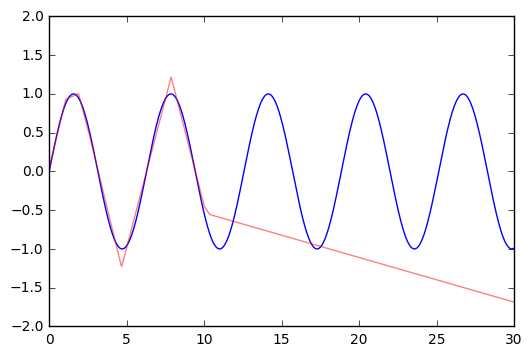

In [224]:
vy = m.forward(x2b)
plt.plot(x2b, y2t)
plt.plot(x2b, vy.data[:,0], color="red", alpha=0.5)
plt.ylim(-2, 2)
print(vy.data.shape)